# Modelo Binomial

Juan Sosa PhD

Email jcsosam@unal.edu.co

GitHub https://github.com/jstats1702

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats as st
from matplotlib import pyplot as plt
%matplotlib inline

## 1 Modelo general

Si Su estado de información acerca de las secuencia de **variables binarias** $y_1,\ldots,y_n$ es intercambiable, entonces el modelamiento $y_1,\ldots,y_n$ admite representación jerárquica de la forma:
$$
\begin{align*}
y_i\mid\theta &\stackrel{\text{iid}}{\sim}\textsf{Ber}(\theta)\,,\quad i = 1,\ldots,n \\
\theta &\sim p(\theta)
\end{align*}
$$
La **distribución muestral (distribución condicional conjunta)** de $\boldsymbol{y} = (y_1,\ldots,y_n)$ dado $\theta$ es
$$
p(\boldsymbol{y}\mid\theta) = \theta^{s}(1-\theta)^{n - s}\,,
$$
donde $s = \sum_{i=1}^n y_i$, lo cual sugiere que $s$ es un **estadístico suficiente** para $\theta$ (i.e., $s$ contiene toda la información que proviene de los datos acerca de $\theta$; saber $s$ es suficiente para hacer inferencia sobre $\theta$). La demostración formal se puede hacer por medio del **Teorema de Factorización de Fisher-Neyman**.

**(Definición.)** Sea $y_1,\ldots,y_n$ una secuencia de variables aleatorias con distribución de probabilidad $f_\theta(y_1,\ldots,y_n)$ que depende de un parámetro desconocido $\theta$. Se dice que el estadístico $t=t(y_1,\ldots,y_n)$ es **suficiente** para $\theta$ si la distribución condicional de $y_1,\ldots,y_n$ dado $t$ no depende de $\theta$.

**(Teorema de Factorización de Fisher-Neyman.)** $t(y_1,\ldots,y_n)$ es un **estadístico suficiente** para $\theta$ si y sólo si se pueden encontrar dos funciones no negativas $h$ y $g_\theta$ tales que $f_\theta(y_1,\ldots,y_n) = h(y_1,\ldots,y_n)\,g_\theta(t(y_1,\ldots,y_n))$.

Por lo tanto, la distribución posterior es
$$
p(\theta\mid\boldsymbol{y}) \propto \theta^{s}(1-\theta)^{n - s}\,p(\theta)\,,
$$

Dado que las $y_i$'s son condicionalmente i.i.d. dado $\theta$ y $s$ es un estadístico suficiente para $\theta$, entonces se acostumbra utilizar el modelo
$$
\begin{align*}
s\mid\theta &\sim \textsf{Bin}(n,\theta) \\
\theta &\sim p(\theta) 
\end{align*}
$$

## 2 Familias conjugadas

La idea básica consiste en encontrar una familia de distribuciones $\mathcal{P}$ de tal forma que el producto de los miembros de esta familia con la distribución muestral también sea parte de $\mathcal{P}$.

**(Definición.)** Una familia de distribuciones $\mathcal{P}$ se denomina **conjugada** para una distribución muestral dada $p(\boldsymbol{y}\mid\boldsymbol{\theta})$, si $p(\boldsymbol{\theta}) \in \mathcal{P}$ entonces $p(\boldsymbol{\theta}\mid \boldsymbol{y}) \in \mathcal{P}$.

Las previas conjugadas conllevan a **cálculos fáciles de realizar**, pero algunos casos pueden ser **poco flexibles** para representar Su estado de información previa.

La distribución previa **no tiene que ser necesariamente** conjugada.

**(Teorema.)** Dada una distribución muestral miembro de la familia exponencial, cualquier información previa se puede expresar como una **mezcla de previas conjugadas** (Diaconis & Ylvisaker, 1985).

***Diaconis, P., & Ylvisaker, D. (1985). Quantifying Prior Opinion, Bayesian Statistics. Vol. 2.***


## 3 Modelo Beta-Binomial 

La familia de distribuciones **Beta** es **conjugada** para la distribución muestral **Binomial**.

La variable aleatoria $X$ tiene **distribución Beta** con parámetros $\alpha,\beta > 0$, i.e., $X\mid\alpha,\beta\sim\textsf{Beta}(\alpha,\beta)$, si su función de densidad de probabilidad es
$$
p(x\mid\alpha,\beta) = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\,\Gamma(\beta)}\,x^{\alpha-1}\,(1-x)^{\beta-1},\quad 0<x<1\,,
$$
donde $\Gamma(x)=\int_0^\infty u^{x-1}\,e^{-u}\,\text{d}u$ es la función Gamma.

Así, el **modelo Beta-Binomial** es
\begin{align*}
s\mid\theta &\sim \textsf{Bin}(s\mid n,\theta) \\
\theta &\sim \textsf{Beta}(a,b)
\end{align*}
donde $a$ y $b$ son los **hiperparámetros** (cantidades fijas conocidas) del modelo. Los hiperparámetros se eligen de tal forma que la distribución previa **refleje Su estado de información** previo. 

Bajo el **modelo Beta-Binomial** se tiene que la **distribución posterior** es
$$
\theta\mid s \sim \textsf{Beta}(\theta\mid a + s, b+n-s)\,.
$$

Además, la **distribución marginal** de $s$ es 
$$
  p(s) = \frac{\Gamma(n+1)}{\Gamma(s+1)\Gamma(n-s+1)}\,\frac{\Gamma(a+b)}{\Gamma(a)\,\Gamma(b)}\,\frac{\Gamma(a+s)\,\Gamma(b+n-s)}{\Gamma(a+b+n)}\,.
$$
Esta distribución se denomina **distribución Beta-Binomial** (mezcla de distribuciones Binomial, usando como pesos valores de una distribución Beta).

De otra parte, la **media posterior** es
$$
\textsf{E}(\theta\mid s) = \frac{a+s}{a+b+n} = \frac{a+b}{a+b+n}\cdot\frac{a}{a+b}+\frac{n}{a+b+n}\cdot\frac{s}{n}\,,
$$
la cual es un **promedio ponderado** del valor esperado previo y la media muestral. 

**(Propiedad.)** Utilizando familias conjugadas, la media posterior se puede expresar como un **promedio ponderado** de la media previa y la media muestral con pesos proporcionales al tamaño de la muestra previa y el tamaño de la muestra.

- Tal observación conlleva a la siguiente interpretación de los hiperparámetros: 
    - $a$ = número previo de 1's.
    - $b$ = número previo de 0's. 
    - $a+b$ = tamaño muestral previo.
- Si $n >> a+b$, entonces la mayoría de la información sobre $\theta$ proviene de los datos en lugar de la información previa. 

**(Propiedad.)** Los resultados Bayesianos son **aproximadamente iguales a los frecuentistas** si: 

1. la distribución previa es difusa (no informativa) y 
2. el tamaño de la muestra es "grande".

Con tamaños de muestra pequeños, las propiedades frecuentistas no son buenas y la alternativa Bayesiana constituye una mejor alternativa.

También, la **distribución predictiva posterior** de una observación futura $y^*$ es 
$$
p(y^* \mid \boldsymbol{y}) = \int_\Theta p(y^*,\boldsymbol{\theta}\mid\boldsymbol{y})\,\textsf{d}\boldsymbol{\theta}  =\int_\Theta p(y^*\mid\boldsymbol{\theta})\,p(\boldsymbol{\theta}\mid\boldsymbol{y})\,\textsf{d}\boldsymbol{\theta}\,.
$$

Bajo el modelo Beta-Binomial se tiene que
$$
\textsf{Pr}(y^*=1\mid s) = \frac{a+s}{a+b+n}\,.
$$
La distribución predictiva posterior **no depende** de cantidades desconocidas. La distribución predictiva depende de los datos. Por tal motivo, $y^*$ no es independiente de $s$.


## 4 Regiones de confianza


**(Definición.)** Una **región de confianza** para $\boldsymbol{\theta}$ es una región del espacio de parámetros $\Theta$ que contiene a $\boldsymbol{\theta}$ con alta probabilidad. 

Por ejemplo, en el caso univariado, luego de observar los datos se construye un intervalo $(l,u)$ tal que $\textsf{Pr}(l<\theta<u\mid \boldsymbol{y})$ sea alta.

**Nivel de confianza Bayesiano**: probabilidad de que el intervalo cubra el verdadero valor del parámetro **después** de que los datos sean observados.

**Nivel de confianza Frecuentista**: probabilidad de que el intervalo cubra el verdadero valor del parámetro **antes** de que los datos sean observados. La confiabilidad está en el proceso. ¿A qué es igual esta probabilidad una vez se han observado los datos?

En el caso univariado, la manera más sencilla de obtener **intervalos de credibilidad** en el paradigma Bayesiano es por medio de los percentiles de la distribución posterior: $(\theta_{\alpha/2},\theta_{1-\alpha/2}\mid \boldsymbol{y})$ es una región de confianza al $100(1-\alpha)\%$ basado en cuantiles, y por lo tanto
$$
\textsf{Pr}\left(\theta_{\alpha/2} < \theta < \theta_{1-\alpha/2}\mid \boldsymbol{y}\right) = 1-\alpha\,.
$$

**(Teorema.)** Un intervalo de credibilidad con un nivel de confianza Bayesiano de $(1-\alpha)\%$, también tiene asintóticamente un nivel de confianza Frecuentista de $(1-\alpha)\%$ (Hartigan, 1966).

***Hartigan, J. A. (1966). Note on the confidence‐prior of Welch and Peers. Journal of the Royal Statistical Society: Series B (Methodological), 28(1), 55-56.***


## 5 Ejemplo: Víctimas violencia sexual

Datos de las víctimas de violencia sexual suministrados por el **Observatorio de Memoria y Conflicto** y el **Centro Nacional de Memoria Histórica** disponibles en https://micrositios.centrodememoriahistorica.gov.co/observatorio/portal-de-datos/base-de-datos/.


In [2]:
# datos
df = pd.read_csv('VictimasVS-1231221.txt', sep = '\t')
# dimension
df.shape

(15886, 18)

In [3]:
# variables
list(df.columns)

['id_caso',
 'codigo_dane_municipio',
 'municipio',
 'departamento',
 'agno',
 'mes',
 'dia',
 'id_persona',
 'sexo',
 'etnia',
 'ocupacion',
 'calidad_victima',
 'tipo_poblacion',
 'militante_politico',
 'grupo_armado',
 'descripcion_grupo_armado',
 'situacion_victima',
 'edad']

In [4]:
# frecuencias sexo
df.sexo.value_counts()

Mujer              14378
Hombre              1481
Sin Informacion       27
Name: sexo, dtype: int64

In [5]:
# proporcion datos faltantes
27/15886

0.0016996097192496537

Se define $y_i = 1$ si el individuo $i$ es mujer, y $y_i = 0$ en caso contrario, $i = 1,\ldots,n$.

In [6]:
# codificacion
df = df[df.sexo != 'Sin Informacion']
df = df.replace('Mujer', 1)
df = df.replace('Hombre', 0)
df.sexo.value_counts()

1    14378
0     1481
Name: sexo, dtype: int64

In [7]:
# extraccion: año 2016
y = df[df.agno == 2016].sexo
# frecuencias
y.value_counts()

1    69
0    11
Name: sexo, dtype: int64

In [8]:
# tamaño de muestra
n = len(y)
print(n)

80


In [9]:
# estadístico suficiente
sy = np.sum(y)
print(sy)

69


In [10]:
# hiperparámetros: previa Beta(1,1)
a = 1
b = 1

In [11]:
# parametros de la posterior
ap = a + sy
print(ap)
bp = b + n - sy
print(bp)

70
12


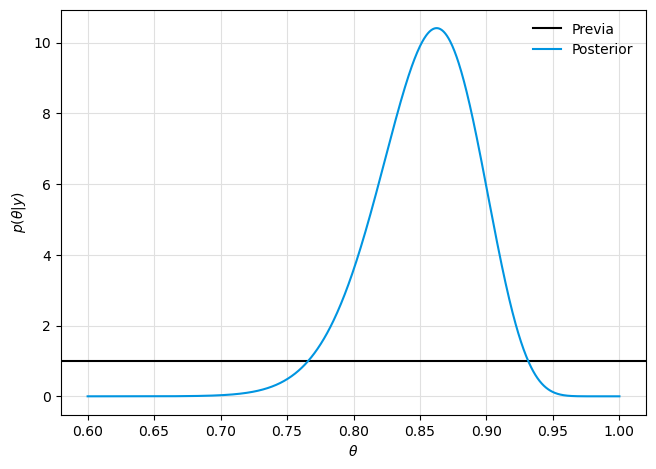

In [12]:
# grafico
my_grid = np.linspace(0.6, 1, 1000)
f = plt.figure(figsize = (6.5,4.5), dpi = 100)
axes = f.add_axes([0.1,0.1,0.9,0.9])
axes.set_xlabel(r'$\theta$')
axes.set_ylabel(r'$p(\theta|y)$')
axes.axhline(y = 1, color = '#000000', label = 'Previa')
axes.plot(my_grid, st.beta.pdf(my_grid, ap, bp), color = '#0095E1', label = 'Posterior')
plt.grid(color = '#e0e0e0')
plt.legend(loc = 0, frameon = False)
plt.show()

In [13]:
# moda posterior
(ap - 1)/(ap + bp - 2)

0.8625

In [14]:
# media posterior
ap/(ap + bp)

0.8536585365853658

In [15]:
# mediana posterior
(ap - 1/3)/(ap + bp - 2/3)

0.8565573770491804

In [16]:
# varianza posterior
(ap*bp)/((ap + bp)**2*(ap + bp + 1))

0.0015051281867505715

In [17]:
# coeficiente de variación
np.sqrt((ap*bp)/((ap + bp)**2*(ap + bp + 1)))/(ap/(ap + bp))

0.045446721279351156

In [18]:
# intervalo de credibilidad al 95%
st.beta.ppf([0.025,0.975], ap, bp)

array([0.76999037, 0.92103799])

In [19]:
st.beta.ppf(0.025, ap, bp)

0.7699903684379342

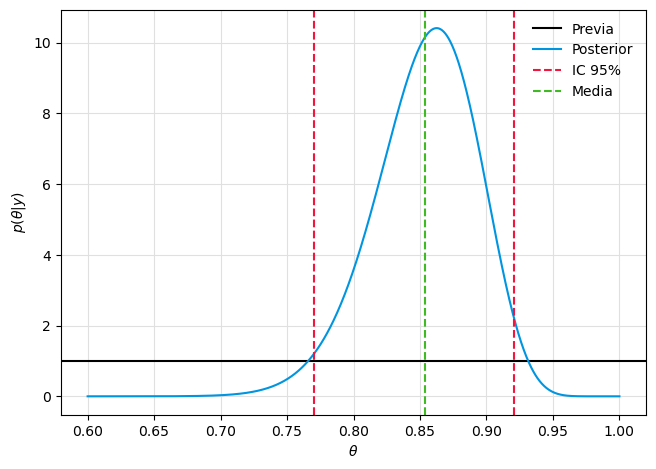

In [20]:
# grafico
f = plt.figure(figsize = (6.5,4.5), dpi = 100)
axes = f.add_axes([0.1,0.1,0.9,0.9])
axes.set_xlabel(r'$\theta$')
axes.set_ylabel(r'$p(\theta|y)$')
axes.axhline(y = 1, color = '#000000', label = 'Previa')
axes.plot(my_grid, st.beta.pdf(my_grid, ap, bp), color = '#0095E1', label = 'Posterior')
axes.axvline(x = st.beta.ppf(0.025, ap, bp), color = '#F4143D', label = 'IC 95%', ls = '--')
axes.axvline(x = st.beta.ppf(0.975, ap, bp), color = '#F4143D', ls = '--')
axes.axvline(x = ap/(ap+bp), color = '#3FBA22', label = 'Media', ls = '--')
plt.grid(color = '#e0e0e0')
plt.legend(loc = 0, frameon = False)
plt.show()

In [21]:
# probabilidad a priori de que theta > 0.8
st.beta.sf(0.8,a,b)
# sf es la función de sobrevivencia definida como 1 - cdf donde cdf es la función de densidad acumulada o función de distribución.

0.19999999999999996

In [22]:
# probabilidad a posteriori de que theta > 0.8
st.beta.sf(0.8,ap,bp)

0.9082293936845718

## 6 Ejemplo: Víctimas violencia sexual

El 91.8% de los abusos sexuales en Colombia pertenecen a mujeres.

https://www.semana.com/nacion/articulo/el-918-de-los-abusos-sexuales-en-colombia-pertenecen-a-mujeres/202212/


In [23]:
# hiperparámetros: previa Beta(1,1)
a = 1
b = 1
# ajuste del modelo por año
# out = np.zeros((22,5))
out = []
for agno in range(2000,2022):
    # datos por año
    y = df[df.agno == agno].sexo
    n = len(y)
    sy = np.sum(y)
    # parámetros de la posterior
    ap = a + sy
    bp = b + n - sy
    # media, desv. estandar, intervalos de credibilidad
    me = ap/(ap + bp)
    de = np.sqrt((ap*bp)/((ap + bp)**2*(ap + bp + 1)))
    ic95 = st.beta.ppf([0.025,0.975], ap, bp)
    # almacenar
    out.append([agno,n,me,de/me] + list(ic95))

# tabla
out = pd.DataFrame(data = out,columns = ["Año","n","Media","CV","Q2.5%","Q97.5%"])
round(out,3)

,Año,n,Media,CV,Q2.5%,Q97.5%
0,2000,1181,0.932,0.008,0.916,0.945
1,2001,1125,0.913,0.009,0.896,0.929
2,2002,1486,0.894,0.009,0.878,0.909
3,2003,1325,0.909,0.009,0.893,0.924
4,2004,1145,0.935,0.008,0.920,0.948
5,2005,925,0.915,0.010,0.896,0.932
6,2006,565,0.919,0.012,0.895,0.940
7,2007,439,0.930,0.013,0.904,0.952
8,2008,402,0.913,0.015,0.884,0.939
9,2009,325,0.930,0.015,0.900,0.955


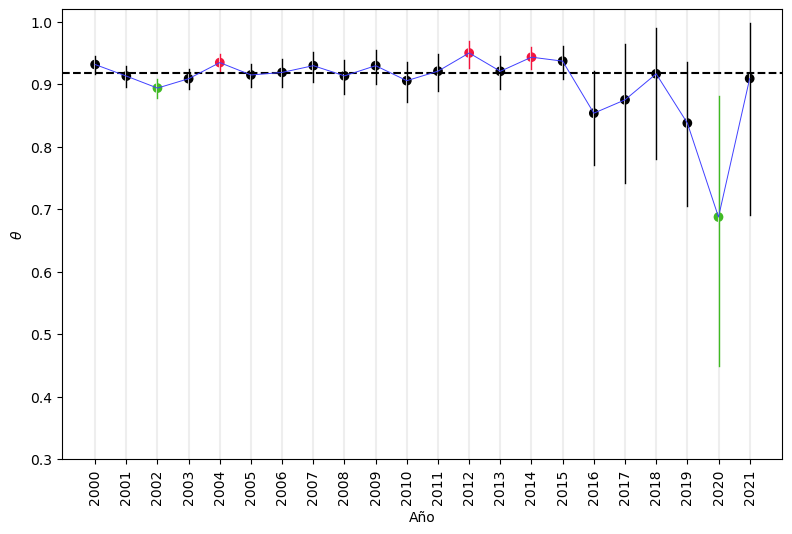

In [24]:
col = np.array(['#000000']*out.shape[0])
col[out["Q2.5%"] > 0.918] = '#F4143D'
col[out["Q97.5%"] < 0.918] = '#3FBA22'
f = plt.figure(figsize = (8,5), dpi = 100)
axes = f.add_axes([0.1,0.1,0.9,0.9])
axes.set_xlabel('Año')
axes.set_ylabel(r'$\theta$')
for i in range(out.shape[0]):
    axes.axvline(x = out.Año[i], color = '#eeeeee', ls = '-')
    axes.plot([out.Año[i]]*2, [out['Q2.5%'][i],out['Q97.5%'][i]], color = col[i], linewidth = 1)
axes.axhline(y = 0.918, color = '#000000', ls = '--')
axes.scatter(out['Año'], out['Media'], color = col)    
axes.plot(out['Año'], out['Media'], color = '#4040ff', linewidth = 0.7) 
axes.set_ylim([0.3,1.02])
axes.set_xticks(out['Año'])
plt.xticks(rotation = 90)
plt.show()

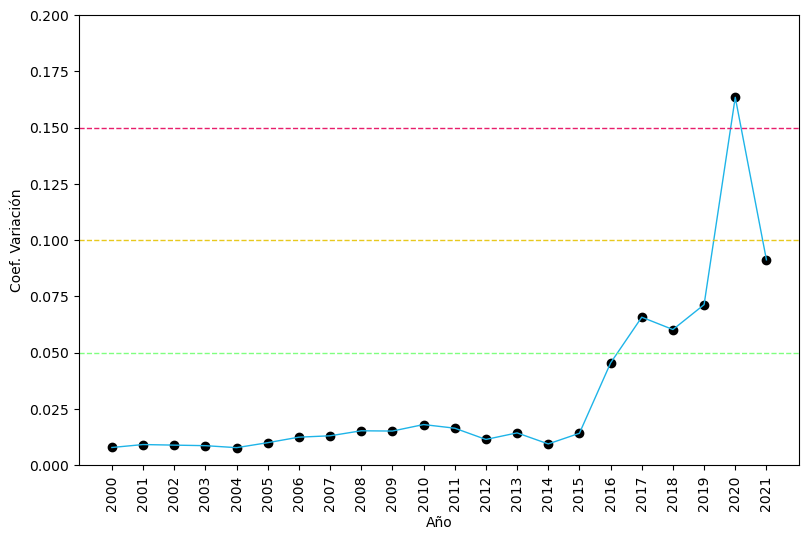

In [25]:
f = plt.figure(figsize = (8,5), dpi = 100)
axes = f.add_axes([0.1,0.1,0.9,0.9])
axes.set_xlabel('Año')
axes.set_ylabel('Coef. Variación')
axes.scatter(out['Año'], out['CV'], color = '#000000')  
axes.plot(out['Año'], out['CV'], color = '#1EB4E8', linewidth = 1)  
axes.axhline(y = 0.05, color = '#80ff80', ls = '--', linewidth = 1)
axes.axhline(y = 0.10, color = '#E8C91E', ls = '--', linewidth = 1)
axes.axhline(y = 0.15, color = '#E81E6B', ls = '--', linewidth = 1)
axes.set_ylim([0.0,0.2])
axes.set_xticks(out['Año'])
plt.xticks(rotation = 90)
plt.show()

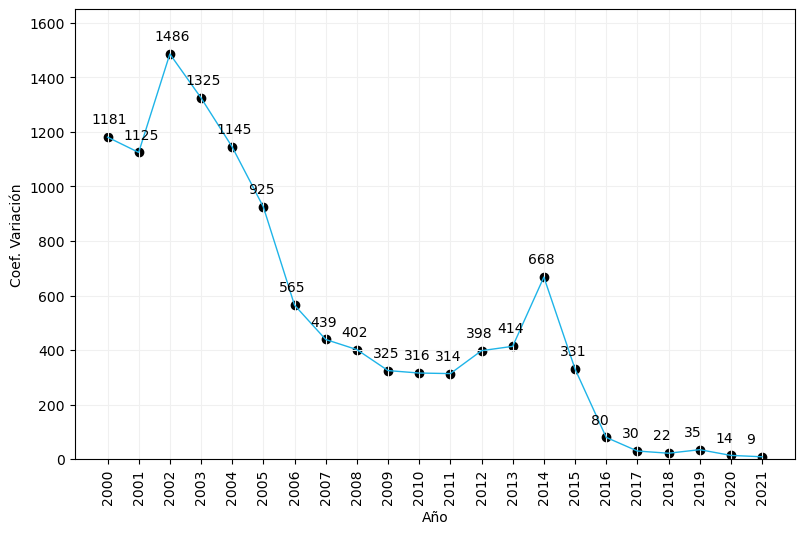

In [26]:
f = plt.figure(figsize = (8,5), dpi = 100)
axes = f.add_axes([0.1,0.1,0.9,0.9])
axes.set_xlabel('Año')
axes.set_ylabel('Coef. Variación')
plt.grid(color = '#f0f0f0')
axes.scatter(out['Año'], out['n'], color = '#000000')  
axes.plot(out['Año'], out['n'], color = '#1EB4E8', linewidth = 1)  
axes.set_ylim([0.0,1650])
axes.set_xticks(out['Año'])
plt.xticks(rotation = 90)
for i in range(out.shape[0]):
    axes.text(out['Año'][i]-0.5, out['n'][i]+50, out['n'][i])
plt.show()


## 7 Ejemplo: Simulación

Simular $N = 10000$ veces $s\sim\textsf{Bin}(n,\theta)$ para $\theta\in\{0.5,0.7,0.9,0.99\}$ y $n\in\{5,30,100\}$, para calcular la cobertura frecuentista (calibración) del intervalo de credibilidad y el intervalo de confianza para $\theta$ con base la muestra aleatoria de tamaño $n$.


In [27]:
N = 10000
out = []
np.random.seed(1234)
for theta in [0.5,0.7,0.9,0.99]:
    for n in [5,30,100]:
        cont_b = cont_f = 0
        temp_b = temp_f = 0
        for j in range(N):
            # simular datos
            s = st.binom.rvs(n = n, p = theta, size = 1)
            # intervalo de credibilidad
            ic = st.beta.ppf([0.025,0.975], 1 + s, 1 + n - s)
            cont_b += ((ic[0] < theta) & (theta < ic[1]))
            temp_b += (ic[1] > 1)
            # intervalo de confianza
            p = s/n
            ic = p + np.array([-1,1])*st.norm.ppf(0.975)*np.sqrt(p*(1-p)/n)
            cont_f += ((ic[0] < theta) & (theta < ic[1]))
            temp_f += (ic[1] > 1)
        out.append([theta, n, cont_b/N, cont_f/N, temp_b/N, temp_f/N])
out = pd.DataFrame(data = out, columns = ["theta","n","Conf. Bayes.","Conf. Frec.","Prop. Bayes. > 1","Prop. Frec. > 1"])
round(out, 2)

,theta,n,Conf. Bayes.,Conf. Frec.,Prop. Bayes. > 1,Prop. Frec. > 1
0,0.50,5,0.94,0.94,0.0,0.47
1,0.50,30,0.95,0.95,0.0,0.00
2,0.50,100,0.94,0.94,0.0,0.00
3,0.70,5,0.97,0.81,0.0,0.67
4,0.70,30,0.93,0.95,0.0,0.01
5,0.70,100,0.95,0.95,0.0,0.00
6,0.90,5,0.92,0.40,0.0,0.40
7,0.90,30,0.98,0.81,0.0,0.61
8,0.90,100,0.94,0.93,0.0,0.00
9,0.99,5,0.95,0.05,0.0,0.05


## 9 Referencias

![Hoff](Hoffcoverbook.jpg)

![Gelman](Gelmancoverbook.png)